Accuracy: 0.77
Precision: 0.81
Recall: 0.77
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

         dos       0.96      0.82      0.88      3332
      normal       0.68      0.97      0.80      4329
       probe       0.80      0.67      0.73      1053
         r2l       0.87      0.03      0.05      1199
         u2r       0.71      0.06      0.11        87

    accuracy                           0.77     10000
   macro avg       0.80      0.51      0.51     10000
weighted avg       0.81      0.77      0.72     10000



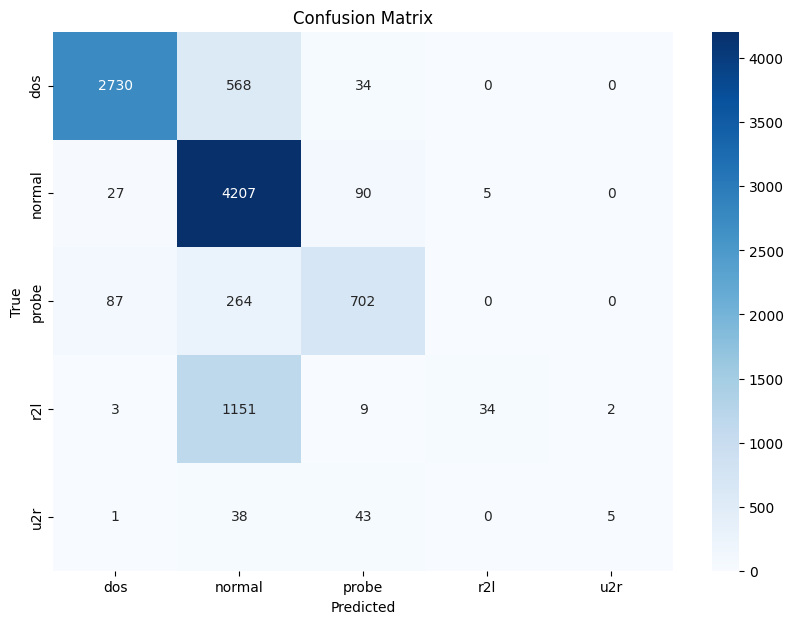

Predicted class for the sample data: dos


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test datasets
train_df = pd.read_csv('/content/Train_data.csv')
test_df = pd.read_csv('/content/test_data.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in train_df.columns:
    train_df = train_df.drop('Unnamed: 0', axis=1)
if 'Unnamed: 0' in test_df.columns:
    test_df = test_df.drop('Unnamed: 0', axis=1)

# Data Preprocessing for both train and test data
# Handle missing values if any
train_df = train_df.dropna()
test_df = test_df.dropna()

# Separate features and labels for training data
X_train = train_df.drop('xAttack', axis=1)
y_train = train_df['xAttack']

# Separate features and labels for test data
X_test = test_df.drop('xAttack', axis=1)
y_test = test_df['xAttack']

# Encode categorical features for both train and test data
categorical_columns = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix for better understanding of the model's performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Example of using the model to make a prediction on a new sample
sample_data = X_test[0].reshape(1, -1)  # Reshape to match the input shape for the model
sample_prediction = knn.predict(sample_data)
print(f"Predicted class for the sample data: {sample_prediction[0]}")
